In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import pip
import sys # Libreria para movernos entre carpetas
import os # Libreria para movernos entre carpetas
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Preprocesar las imagenes 
from tensorflow.keras import optimizers # Optimizador del algoritmo
from tensorflow.keras.models import Sequential # Módelo secuencial para hacer la red neuronal
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation # Parametros para la red 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D # Modificar las capas de entrada de las imagenes a la red
from tensorflow.keras import backend as k # cerrar sesiones anteriores 


In [2]:
#  Cerrar sesiones anteriores 
k.clear_session()

### Creación de variables para cargardatos

In [3]:
data_entrenamiento = './data/entrenamiento'
data_validacion = './data/validacion'

## Parámetros para la red N

In [4]:
epocas = 15 # Número de veces de iteración de los datos en el entrenamiento 
altura = 100 # altura en pixeles de la imagen
longitud = 100 # longitus en pixeles de la imagen
batch_size = 32 # némero de imagenes a procesar en cada uno de los pasos
pasos = 100 # El número de veces que se procesa la informacion en cada una de las epocas 
pasos_validacion = 100 # las veces que se procesan los datos de validación para ver que tan bien aprende el algoritmo
filtrosConv1 = 32 # Número de filtros aplicados a cada convolución, la imagen tendrá una profundidad de 32
filtrosConv2 =64 # Número de filtros aplicados a cada convolución, la imagen tendrá una profundidad de 64
tamano_filtro1 = (3,3) # tamaño del kernel
tamano_filtro2 = (2,2) # tamaño del kernel
tamano_pool = (2,2) # tamaño del filtro usado en el maxpooling 
clases = 10 # son la cantidad de clasificadores
lr = 0.0005 # learnig rate que tan grande son los ajustes que hace la red neuronal para acercarse a una solución optima


# <p style="color:rgb(255,90,0);">__Preprocesamiento de las imagenes__</p>

In [5]:
entrenamiento_datagen = ImageDataGenerator(
    rescale = 1./255, # Reescala los pixeles de la imagen
    shear_range = 0.3, # Va a inclinar las imagenes para que el algoritmo aprenda que no siempre la imagen va a estar recta
    zoom_range = 0.3, # tomara la imagen y les dara zoom a lagunas 
    horizontal_flip = True # tomara una imagen y la invertira 
)

# Para las imagenes de validación solo se reescala porque deben ser dadas al algoritmo tal cual estan
validacion_datagen = ImageDataGenerator(
    rescale = 1./255,
)




# <p style="color:rgb(255,120,0);">__Usar las imagenes para generar la Red N__</p>

In [6]:
imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size = (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical'
)



Found 72105 images belonging to 10 classes.


In [7]:
imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion,
    target_size = (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical'

)

Found 5000 images belonging to 10 classes.



# <body><p style="color:rgb(255,100,50);">__CREAR LA RED CONVOLUCIONAL__</p><body>

In [8]:
cnn = Sequential()
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))



## Compilar el modelo

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               10240256  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

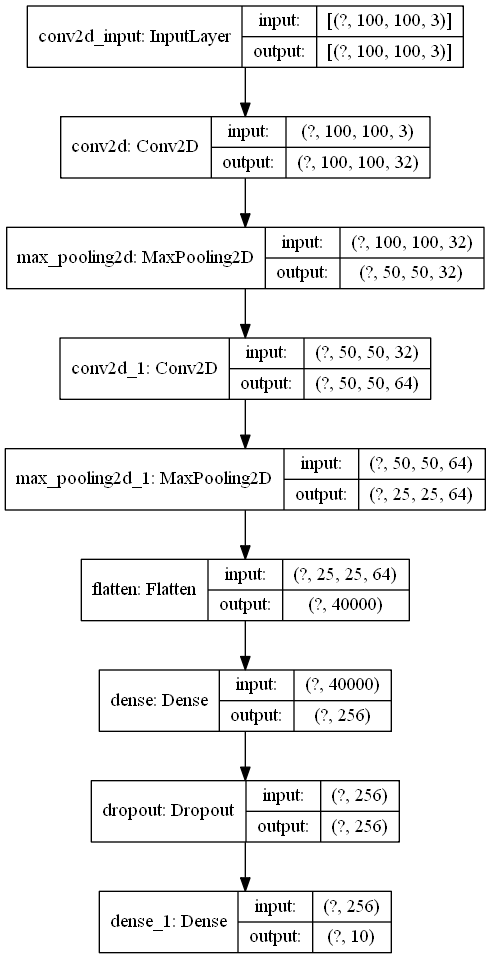

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,  show_shapes=True)

In [11]:
cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=lr),
            metrics=['accuracy'])

# <body><p style="color:rgb(255,100,50);">__ENTRENAR EL ALGORITMO__</p><body>

[Resolver problema ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.](https://github.com/asataniAIR/Image_DL_Tutorial/issues/4)

In [12]:
from PIL import Image

In [13]:

history = cnn.fit(
    imagen_entrenamiento,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=imagen_validacion,
    validation_steps=pasos_validacion)

Epoch 1/15
100/100 [==============================] - 66s 656ms/step - loss: 1.4894 - accuracy: 0.4894 - val_loss: 1.1882 - val_accuracy: 0.6150
Epoch 2/15
100/100 [==============================] - 55s 549ms/step - loss: 0.8589 - accuracy: 0.7163 - val_loss: 0.7614 - val_accuracy: 0.7759
Epoch 3/15
100/100 [==============================] - 60s 603ms/step - loss: 0.6771 - accuracy: 0.7759 - val_loss: 0.6341 - val_accuracy: 0.7819
Epoch 4/15
100/100 [==============================] - 60s 597ms/step - loss: 0.5754 - accuracy: 0.8066 - val_loss: 0.5709 - val_accuracy: 0.7947
Epoch 5/15
100/100 [==============================] - 81s 814ms/step - loss: 0.5164 - accuracy: 0.8269 - val_loss: 0.5058 - val_accuracy: 0.8081
Epoch 6/15
100/100 [==============================] - 68s 678ms/step - loss: 0.4380 - accuracy: 0.8516 - val_loss: 0.5176 - val_accuracy: 0.8319
Epoch 7/15
100/100 [==============================] - 62s 616ms/step - loss: 0.3976 - accuracy: 0.8737 - val_loss: 0.5263 - val_ac

# <body><p style="color:rgb(255,100,100);">__Guardar el modelo__</p><body>

In [15]:
dir = './modelo'

if not os.path.exists(dir):
    os.mkdir(dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')